<a href="https://colab.research.google.com/github/jkoniecznyy/Machine-Learning-pyton/blob/main/ML_7_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zadanie
Zadanie polega na własnoręcznym zaimplementowaniu algorytmu k-means. Algorytm powinien być zaimplementowany w oparciu o bibliotekę `Numpy`. Podczas implementacji nie wolno korzystać z bibliotek typu `sklearn`, które mają ten algorytm wbudowany. Dopuszczalne jest natomiast wykorzystywanie tego rodzaju bibliotek w celach porównawczych, do sprawdzenia czy nasz algorytm działa poprawnie. Ocenie podlega rozwiązanie i odpowiedź.


- Zaimplementuj `K-means` w przestrzeni dwuwymiarowej (każdy punkt ma dwie współrzędne). - *(dostateczny)*
- Zmniejsz problem związany z 'utknięciem' w lokalnym optimum poprzez wywołanie algorytmu 100 razy i wybranie rozwiązania z najmniejszą funkcją kosztu - *(dostateczny plus)*
- Zwizualizuj wyniki na wykresie - *(dobry)*
- Rozszerz swoją implementację o `K-means++` lub zmień ją tak by działała w n-wymiarowej przestrzeni - *(bardzo dobry)*

In [95]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import copy

In [96]:
def drawGraph(centroids, clusters):
    # draw the (only) 2 dimensional demonstrative graph for given centroids and clusters

    colors = ['b', 'g', 'r', 'c', 'm', 'y']
    plt.figure()

    for cluster in clusters:
        # go through every cluster

        for point in clusters[cluster]:
            # go through every point in a given cluster

            plt.scatter(point[0], point[1], c=colors[cluster % len(colors)], marker='.')
            # draw all the points from given cluster with marker .

        plt.scatter(centroids[cluster][0], centroids[cluster][1], c='k', marker='x')
        # draw the centroid matching given cluster with marker x


def calculateCost(centroids, clusters, totalPoints):
    # calculate the cost for current set of centroids
    # the lower the better

    totalSum = 0.0
    for cluster in clusters:
        # go through every cluster

        totalSum += ((np.linalg.norm(clusters[cluster] - centroids[cluster])) ** 2)
        # calculate the summed distance for all of the points in a given cluster 
        # to the assigned centroid multiplied by 2

    return totalSum / totalPoints
    # return the sum of distances from all clusters divided by the total number of points


def createClusters(data, centroids, numberOfCentroids):
    # Calculate the distances from every point to the centroids
    # and assign every point to the closest centroid

    clusters = {}
    for i in range(numberOfCentroids):
        clusters[i] = []
    # Prepare the clusters dictionary

    for point in data:
        # go through every point in given data
        distances = []
        for centroid in centroids:
            distances.append(np.linalg.norm(point - centroid))
        # calculate the distance from a point to every centroid
        # and save it in the distances array

        numberOfCluster = distances.index(min(distances))
        clusters[numberOfCluster].append(point)
        # assign the point to the closest centroid

    return clusters


def createCentroids(data, numberOfCentroids):
    # Pick random set of points from given data and return 
    # copy of them as the starting centroids
    start = np.random.randint(len(data) - numberOfCentroids - 1)
    end = start + numberOfCentroids
    return copy.deepcopy(data[start:end])
    # copy.deepcopy() is very important here, without it
    # moving centroids would move the points too

def moveCentroids(centroids, clusters):
    # Calculate the n dimensional average value for every cluster
    # and move the centroids to the calculated values

    for cluster in clusters:
        # go through every cluster

        averaged = np.average(clusters[cluster], axis=0)
        centroids[cluster] = averaged
        # calculate the average value for all coordinates of all points in given cluster
        # move the centroid to the calculated value

    return centroids


def kmeansClustering(data, numberOfCentroids=3, kmeansExecutions=60, shiftsForExecution=30):
    # Take:
    # an array containing n dimensional coordinates of the points (double),
    # number of centroids (positive int),
    # number of executions of the k-means clustering (positive int),
    # number of centroid shifts for each k-means execution (positive int).
    #
    # Do:
    # Execute the k-means clustering a specified number of times and return centroids, clusters
    # and cost value of the most effective clustering achieved for given data. Draw the graph
    #
    # Return:
    # centroids - array containing n dimensional coordinates of the centroids,
    # example: [ [coordinates of centroid0] [coordinates of centroid1] ... ]
    #
    # clusters  - Dictionary containing cluster number paired with
    #             array containing n dimensional coordinates of the points ,
    # example: {0: points assigned to cluster0, 1: points assigned to cluster1, ...}
    #
    # cost      - value of the cost function (the less the better).
    # example: 0.045024049907778196
    cost = np.inf
    # Set final cost value to infinite

    for i in range(kmeansExecutions):
        # Do the k-means clustering a specified number of times

        centroidsTemp = createCentroids(data, numberOfCentroids)
        # Create first centroids

        for x in range(shiftsForExecution):
            clustersTemp = createClusters(data, centroidsTemp, numberOfCentroids)
            centroidsTemp = moveCentroids(centroidsTemp, clustersTemp)
        # Match the points to the centroids and then
        # recalculate the centroids for a specified number of times

        costTemp = calculateCost(centroidsTemp, clustersTemp, len(data))
        # Calculate the cost value for current centroids

        
        if costTemp < cost:
            cost = costTemp
            centroids = centroidsTemp
            clusters = clustersTemp
        # If the cost is less than the cost previously obtained save the parameters

    drawGraph(centroids, clusters)
    return centroids, clusters, cost
    # Draw a graph and return the final results

points:  [[-0.76840124 -0.70602799]
 [-1.00453446 -0.6583542 ]
 [-0.40164905 -0.10623837]
 [-0.04941971 -0.26413169]
 [-0.16561146 -0.76494969]
 [ 0.00174846 -0.0207804 ]
 [ 0.04738064  0.26464528]
 [-0.53366872  0.15684646]
 [ 0.08708281  0.03081657]
 [ 0.10867449 -0.02550214]
 [ 0.46247852  0.50038055]
 [ 0.84032218 -0.10208948]
 [-0.30009295 -0.75408445]
 [-0.34274325  0.2352066 ]
 [-0.67092561 -0.09074162]]
kmeansResults:
centroids:  [[-0.54926907 -0.41764998]
 [ 0.14444052  0.07731816]]
clusters:  {0: [array([-0.76840124, -0.70602799]), array([-1.00453446, -0.6583542 ]), array([-0.40164905, -0.10623837]), array([-0.16561146, -0.76494969]), array([-0.53366872,  0.15684646]), array([-0.30009295, -0.75408445]), array([-0.67092561, -0.09074162])], 1: [array([-0.04941971, -0.26413169]), array([ 0.00174846, -0.0207804 ]), array([0.04738064, 0.26464528]), array([0.08708281, 0.03081657]), array([ 0.10867449, -0.02550214]), array([0.46247852, 0.50038055]), array([ 0.84032218, -0.10208948])

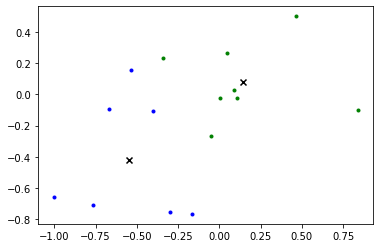

In [97]:
# Quick showdown for 2 dimensions
# 2 Dimensions, 15 points, 2 centroids, 10 kmeansExecutions,  5 shiftsForExecution
numberOfDimensions = 2
numberOfCentroids = 2
points = np.vstack(((np.random.randn(5, numberOfDimensions) * 0.75),
                    (np.random.randn(5, numberOfDimensions) * 0.25),
                    (np.random.randn(5, numberOfDimensions) * 0.5)))
print('points: ', points)
# numberOfDimensions is used only for creating the data, we don't need to pass it to the kmeansClustering
kmeansResults = kmeansClustering(points, numberOfCentroids, 10, 5)

print('kmeansResults:')
print('centroids: ', kmeansResults[0])
print('clusters: ', kmeansResults[1])
print('cost: ', kmeansResults[2])


points:  [[-0.15674303 -0.6836342   1.26851748  1.45344885 -0.64022496]
 [-0.0229844   0.32549926 -0.49182825  0.12318701  0.2637342 ]
 [-0.29777629  1.30817023  0.43594645  0.35593987 -0.51803901]
 [ 0.58805975 -0.25652682  1.21143187  0.85970005  0.51225571]
 [-0.74379301 -0.20515612 -0.081467    0.19097764  1.7802711 ]
 [-0.08486227  0.0298521  -0.37650559 -0.14905413  0.19891934]
 [ 0.21439731 -0.15456164  0.31950971  0.43212575  0.22240159]
 [-0.20177034  0.07632862  0.19485771  0.17332202  0.05057961]
 [ 0.27996305  0.47289501 -0.00450577  0.12050959  0.0154989 ]
 [-0.06507441 -0.07960977  0.17262717  0.31018546 -0.51953866]
 [-0.38075588 -0.30133704 -0.38533869  1.15964095  0.45712042]
 [-0.45923064  0.35608782  0.11181185 -0.7213608   0.4805478 ]
 [-0.31238988  0.35588719 -0.14354948  0.18509978  1.00201025]
 [-0.58786119 -0.53182375  0.55850219 -0.52945256 -0.35459613]
 [ 0.07395689 -0.36914323 -0.47373025  0.89993101 -0.26753851]]
kmeansResults:
centroids:  [[ 0.21565836 -0.4

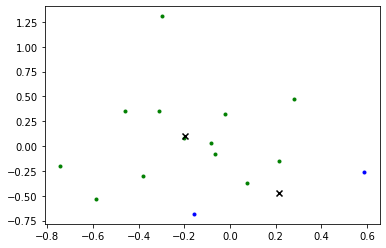

In [103]:
# Quick showdown for 5 dimensions (remember that the plot is in only 2 dimensions so the graph will look strange)
# 5 Dimensions, 15 points, 2 centroids, 10 kmeansExecutions,  5 shiftsForExecution
numberOfDimensions = 5
numberOfCentroids = 2
points = np.vstack(((np.random.randn(5, numberOfDimensions) * 0.75),
                    (np.random.randn(5, numberOfDimensions) * 0.25),
                    (np.random.randn(5, numberOfDimensions) * 0.5)))
print('points: ', points)
# numberOfDimensions is used only for creating the data, we don't need to pass it to the kmeansClustering

kmeansResults = kmeansClustering(points, numberOfCentroids, 10, 5)

print('kmeansResults:')
print('centroids: ', kmeansResults[0])
print('clusters: ', kmeansResults[1])
print('cost: ', kmeansResults[2])


2 dimensions
2 centroids cost value:  0.5882070879850633
4 centroids cost value:  0.33930925060139827


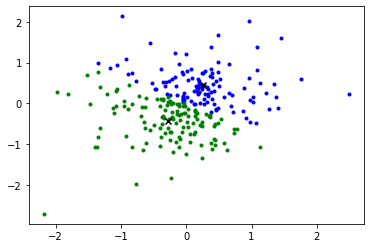

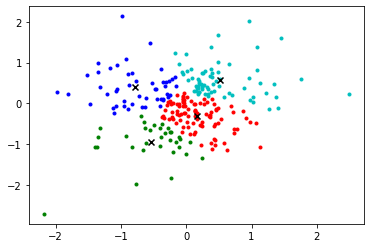

In [99]:
# 2 Dimensions, 250 points, 2 or 4 centroids for the same data, 40 kmeansExecutions,  20 shiftsForExecution
numberOfDimensions = 2
numberOfCentroids = 2
points = np.vstack(((np.random.randn(150, numberOfDimensions) * 0.75),
                  (np.random.randn(50, numberOfDimensions) * 0.25),
                  (np.random.randn(50, numberOfDimensions) * 0.5)))
# prepare the data

kmeansResults1 = kmeansClustering(points, numberOfCentroids, 40, 20)
numberOfCentroids += 2
kmeansResults2 = kmeansClustering(points, numberOfCentroids, 40, 20)
# do the clustering

print(f'{numberOfDimensions} dimensions')
print(f'{numberOfCentroids - 2} centroids cost value: ', kmeansResults1[2])
print(f'{numberOfCentroids} centroids cost value: ', kmeansResults2[2])
# show results

2 dimensions
4 centroids cost value:  0.287647383468585
6 centroids cost value:  0.19187782859506308


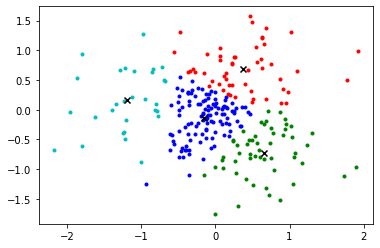

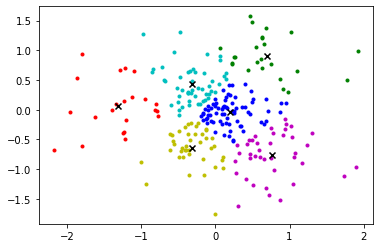

In [100]:
# 2 Dimensions, 250 points, 4 or 6 centroids for the same data, 40 kmeansExecutions,  20 shiftsForExecution
numberOfDimensions = 2
numberOfCentroids = 4
points = np.vstack(((np.random.randn(150, numberOfDimensions) * 0.75),
                  (np.random.randn(50, numberOfDimensions) * 0.25),
                  (np.random.randn(50, numberOfDimensions) * 0.5)))
# prepare the data

kmeansResults1 = kmeansClustering(points, numberOfCentroids, 40, 20)
numberOfCentroids += 2
kmeansResults2 = kmeansClustering(points, numberOfCentroids, 40, 20)
# do the clustering

print(f'{numberOfDimensions} dimensions')
print(f'{numberOfCentroids - 2} centroids cost value: ', kmeansResults1[2])
print(f'{numberOfCentroids} centroids cost value: ', kmeansResults2[2])
# show results

4 dimensions
2 centroids cost value:  1.282298438800037
4 centroids cost value:  0.9761008282560242


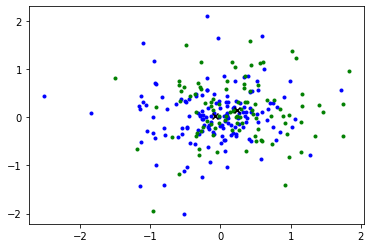

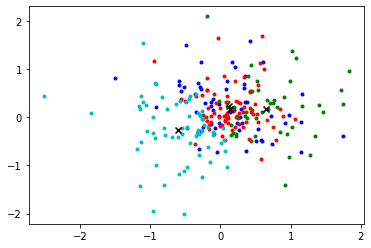

In [101]:
# 4 Dimensions, 250 points, 2 or 4 centroids for the same data, 40 kmeansExecutions,  20 shiftsForExecution
numberOfDimensions = 4
numberOfCentroids = 2
points = np.vstack(((np.random.randn(150, numberOfDimensions) * 0.75),
                  (np.random.randn(50, numberOfDimensions) * 0.25),
                  (np.random.randn(50, numberOfDimensions) * 0.5)))
# prepare the data

kmeansResults1 = kmeansClustering(points, numberOfCentroids, 40, 20)
numberOfCentroids += 2
kmeansResults2 = kmeansClustering(points, numberOfCentroids, 40, 20)
# do the clustering

print(f'{numberOfDimensions} dimensions')
print(f'{numberOfCentroids - 2} centroids cost value: ', kmeansResults1[2])
print(f'{numberOfCentroids} centroids cost value: ', kmeansResults2[2])
# show results

4 dimensions
4 centroids cost value:  0.9879562367259364
6 centroids cost value:  0.7984210073716779


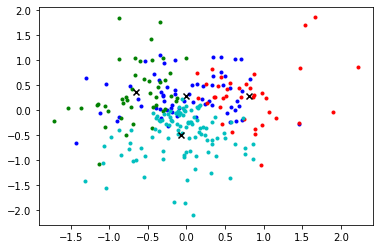

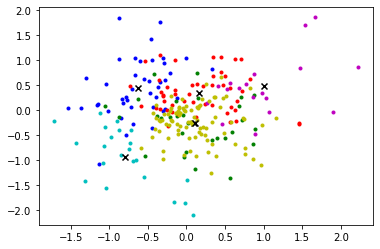

In [102]:
# 4 Dimensions, 250 points, 4 or 6 centroids for the same data, 40 kmeansExecutions,  20 shiftsForExecution
numberOfDimensions = 4
numberOfCentroids = 4
points = np.vstack(((np.random.randn(150, numberOfDimensions) * 0.75),
                  (np.random.randn(50, numberOfDimensions) * 0.25),
                  (np.random.randn(50, numberOfDimensions) * 0.5)))
# prepare the data

kmeansResults1 = kmeansClustering(points, numberOfCentroids, 40, 20)
numberOfCentroids += 2
kmeansResults2 = kmeansClustering(points, numberOfCentroids, 40, 20)
# do the clustering

print(f'{numberOfDimensions} dimensions')
print(f'{numberOfCentroids - 2} centroids cost value: ', kmeansResults1[2])
print(f'{numberOfCentroids} centroids cost value: ', kmeansResults2[2])
# show results